In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Get Data

In [31]:
all_data = pd.read_csv('vgsales.csv') #sales are in millions

all_data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Cleanup Data

In [32]:
#all_data.isnull().any()

all_data[all_data.isna().any(axis=1)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


#### It seems only Year and Publisher columns contain NaNs, in which case it is safe to proceed

### Question 1 - Which platform sold the most games?

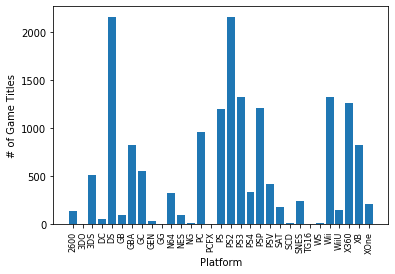

In [33]:
platforms = all_data.groupby('Platform').count()

plt.bar(platforms.index, platforms['Rank'])
plt.ylabel('# of Game Titles')
plt.xlabel('Platform')
plt.xticks(platforms.index, rotation='vertical', size=8)
plt.show()

In [34]:
print('DS =', platforms.loc['DS', 'Rank'])
print('PS2 =', platforms.loc['PS2', 'Rank'])

DS = 2163
PS2 = 2161


### Answer 1 - DS had the most game titles

### Question 2 - Which platform sold the most games for each year? 

In [35]:
#sales = all_data.groupby(['Year','Platform'])['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales'].sum()
sales = all_data.groupby(['Platform','Year'])['Global_Sales'].sum()
sales


# uniqnames = sales.name.unique() # get unique names
# newdata = []                 # data list for output dataframe
# for u in uniqnames:          # for each unique name
#     subdf = df[df.name == u] # get rows with this unique name
#     s = ""
#     for i in subdf['info']:
#         s += "("+i+"),"      # join all info cells for that name
#     newdata.append([u, s[:-1]]) # remove trailing comma from infos & add row to data list

# newdf = pd.DataFrame(data=newdata, columns=['name','info'])
# print(newdf)


#plt.plot(sales.index, sales['Global_Sales'])
# for x in sales.index

# plt.ylabel('Sales in mlns')
# plt.xlabel('Platform')
# plt.xticks(sales.index, rotation='vertical', size=8)
# plt.show()

Platform  Year  
2600      1980.0    11.38
          1981.0    35.77
          1982.0    28.86
          1983.0     5.83
          1984.0     0.27
                    ...  
XB        2008.0     0.18
XOne      2013.0    18.60
          2014.0    52.43
          2015.0    57.66
          2016.0    12.37
Name: Global_Sales, Length: 241, dtype: float64

In [36]:
sales.index.get_level_values(0)

Index(['2600', '2600', '2600', '2600', '2600', '2600', '2600', '2600', '2600',
       '2600',
       ...
       'XB', 'XB', 'XB', 'XB', 'XB', 'XB', 'XOne', 'XOne', 'XOne', 'XOne'],
      dtype='object', name='Platform', length=241)

### Question 3 - Show a graph of platform popularity based on number of game titles over the years

### Question 4 - Which genre was most popular for PS4?

<function matplotlib.pyplot.show(*args, **kw)>

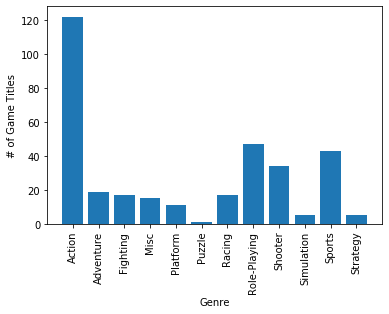

In [51]:
ps4 = all_data.loc[all_data['Platform'] == 'PS4']
ps4_genre = ps4.groupby('Genre').count()

plt.bar(ps4_genre.index, ps4_genre['Rank'])
plt.ylabel('# of Game Titles')
plt.xlabel('Genre')
plt.xticks(ps4_genre.index, rotation='vertical')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

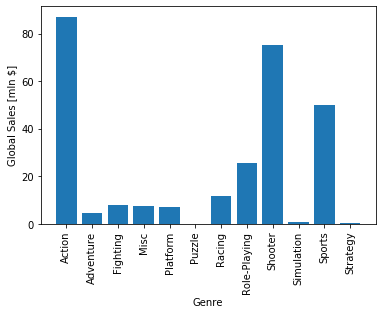

In [52]:
ps4_sales = ps4.groupby('Genre').sum()

plt.bar(ps4_sales.index, ps4_sales['Global_Sales'])
plt.ylabel('Global Sales [mln $]')
plt.xlabel('Genre')
plt.xticks(ps4_sales.index, rotation='vertical')
plt.show

### Question 5 - On average which genre has the most sales?